## Matriz de Confusión

Una matriz de confusión es una tabla que se puede utilizar para medir el rendimiento de un algoritmo de aprendizaje automático, generalmente uno de aprendizaje supervisado (de clasificación). Cada fila de la matriz de confusión representa las instancias de una clase real y cada columna representa las instancias de una clase predicha.

<img src="img/mat.jpg"/>

Actualmente hemos estado realizando la métrica de exactitud como el total de los valores correctamente predichos sobre el total de todos los valores de la muestra. A pesar de que es una métrica válida, es incompleta y no brinda mayor detalle sobre lo que realmente está haciendo el algoritmo. 

La matriz de confusión nos proporciona más información (métricas) que nos permite identificar el tipo de errores que realiza nuestro modelo y para identificar si existe algún problema con algún tipo de clase (desequilibrios).

Veamos las métricas que podemos obtener de una matriz de confusión: 

Para ejemplificar, supongamos tenemos una **funcion f(foto) -> [cancer, no-cancer]**, que permite identificar si una foto de una mancha en la piel corresponde o no a un caso de cáncer.

### Valores de la Matriz:

- **True Positive (TP)**: El algoritmo recibe una foto como parámetro y lo clasifica como un cáncer. Cada predicción de este tipo suma 1 a TP.
- **<font color='red'>False Negative (FN)</font>**: El algoritmo recibe una foto como parámetro y lo clasifica como no-cáncer. Esto se denomina como error del tipo II, ya que la foto si ha sido clasificada como un melanoma.
- **True Negative (TN)**: El algoritmo recibe una foto como parámetro y lo clasifica como un no-cáncer. Efectivamente, la foto no corresponde a un caso maligno.
- **<font color='red'>False Positive (FP)</font>**: El algoritmo recibe una foto como parámetro e indica que es cáncer, pero en realidad no lo es. Esto se denomina como error del tipo I. Normalmente los errores de tipo I son considerados errores de menor severidad que los errores de tipo II (sin embargo ambos son errores). 

### Metricas Adicionales (probabilidades marginales)

- **Precision:** Responde a la pregunta: ¿qué proporción de las identificaciones positivas (predichas), son realmente correctas? 
- **Recall (*Sensitivity*):** Responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"
- **Specificity:**: Similar al Recall, busca idenficar la tasa de los negativos actuales que fueron clasificados correctamente.  
- **Negative Predicted Value:** indica la probabilidad de que una foto que fue clasificada como "no-cancer" realmente no sea maligna. 
- **<font color='green'>Accuracy:</font>** El la probabilidad de que de que el modelo clasifique correctamente (para las clases existentes)


### Otras Metricas:

$$F1Score = \frac{2*precision*recall}{precision+recall} = \frac{2*TP}{2*TP+FP+FN}$$

- **F1-Score**: Es una medida de la precisión de una prueba: es la media armónica de *precision* y *recall*. Puede tener una puntuación máxima de 1 (*precision* y *recall* perfectos) y un mínimo de 0. En general, es una medida de la precisión y robustez de su modelo. 

Importante:

- *Accuracy* se usa cuando los verdaderos positivos (TP) y los verdaderos negativos (TN) son más importantes, mientras que la *F1Score* se usa cuando los falsos negativos y los falsos positivos son cruciales.
- *Accuracy* se puede utilizar cuando la distribución de clases es similar, mientras que el *F1Score* es una mejor métrica cuando hay clases desequilibradas (imbalanced).

### Ejemplo de uso de Matriz de Confusion: SVM con Kernel Linear vs Logistic Regression

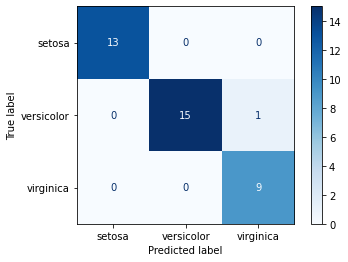

Desplegar Matriz
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


#classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
classifier = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)
plt.show()

print("Desplegar Matriz")
print(disp.confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report

y_prima = classifier.predict(X_test)

print(classification_report(y_test, y_prima, target_names=class_names))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prima)